# Problem Statement

- Sarimax
- Trend term
- Cnsider seasonality

Consider adding this to an ARIMA model

# Get and Clean the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
!pip install -U quandl

  Using cached https://files.pythonhosted.org/packages/8c/55/53084c085ba50df5f19ca30d1d38b2867317e9b52d2aacbf5f5edb601a5c/Quandl-3.4.6-py2.py3-none-any.whl


In [5]:
import quandl

In [6]:
quandl.ApiConfig.api_key = "jxC-KVB_9JeCoybG1f4x"

In [7]:
nroust = quandl.get('FRED/NROUST')

In [8]:
nroust.rename(columns={'Value':'natural_rate_of_unemployment'}, inplace = True)

In [9]:
gdppot = quandl.get('FRED/GDPPOT')

In [10]:
gdppot.rename(columns={'Value':'real_potential_gdp'}, inplace = True)

In [11]:
df = pd.merge(nroust,gdppot,on='Date')
df.head()

,natural_rate_of_unemployment,real_potential_gdp
Date,,
1949-01-01,5.255,2106.8
1949-04-01,5.261,2133.7
1949-07-01,5.268,2161.0
1949-10-01,5.274,2188.8
1950-01-01,5.281,2217.1


In [12]:
df.sort_index(inplace=True)

# EDA

In [13]:
# Check data types and size
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 324 entries, 1949-01-01 to 2029-10-01
Data columns (total 2 columns):
natural_rate_of_unemployment    324 non-null float64
real_potential_gdp              324 non-null float64
dtypes: float64(2)
memory usage: 7.6 KB


In [14]:
# Check shape
df.shape

(324, 2)

In [15]:
# any null values?
df.isnull().sum()

natural_rate_of_unemployment    0
real_potential_gdp              0
dtype: int64

In [16]:
# Check type of object to be sure...
type(df)

pandas.core.frame.DataFrame

#### The data is split into quaterly periods.

In [17]:
df['2018']

,natural_rate_of_unemployment,real_potential_gdp
Date,,
2018-01-01,4.614,18372.4
2018-04-01,4.612,18462.7
2018-07-01,4.609,18556.7
2018-10-01,4.607,18653.6


In [18]:
df['1949']

,natural_rate_of_unemployment,real_potential_gdp
Date,,
1949-01-01,5.255,2106.8
1949-04-01,5.261,2133.7
1949-07-01,5.268,2161.0
1949-10-01,5.274,2188.8


In [19]:
df ['2008']

,natural_rate_of_unemployment,real_potential_gdp
Date,,
2008-01-01,4.890,15764.5
2008-04-01,4.936,15836.5
2008-07-01,4.957,15905.9
2008-10-01,5.073,15971.7


In [20]:
df['1949':'2000'].head()

,natural_rate_of_unemployment,real_potential_gdp
Date,,
1949-01-01,5.255,2106.8
1949-04-01,5.261,2133.7
1949-07-01,5.268,2161.0
1949-10-01,5.274,2188.8
1950-01-01,5.281,2217.1


In [21]:
def plot_rolling(column, year1, year2, rolling_number):
    plt.figure(figsize=(12,9))
    plt.plot(df[column][year1:year2], label = 'Regular')
    plt.plot(df[column][year1:year2].rolling(rolling_number).mean(), label = 'Rolling')
    plt.legend()

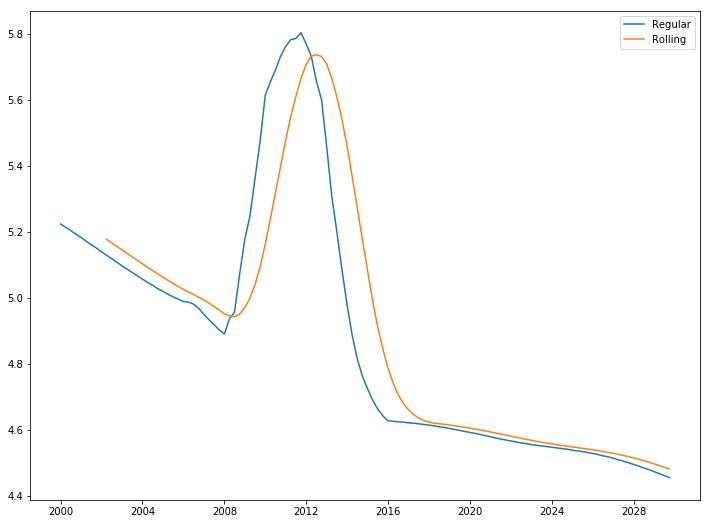

In [30]:
plot_rolling('natural_rate_of_unemployment', '2000', '2030', 10);

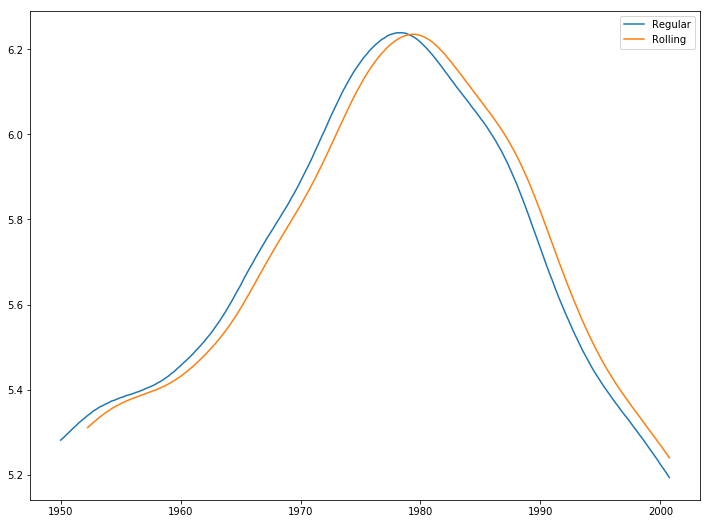

In [23]:
plot_rolling('natural_rate_of_unemployment', '1950','2000',10)

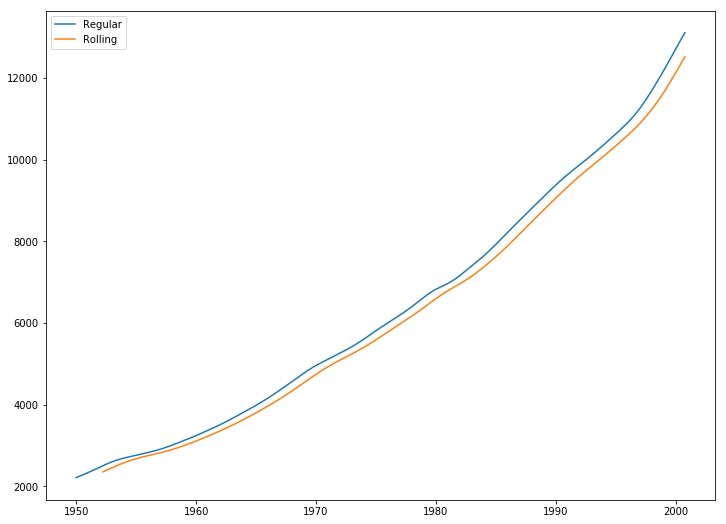

In [24]:
plot_rolling('real_potential_gdp', '1950', '2000', 10)

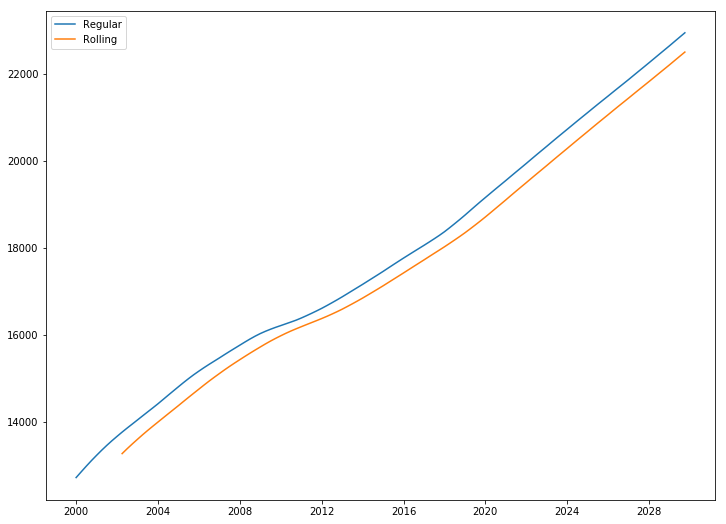

In [25]:
plot_rolling('real_potential_gdp', '2000', '2030', 10)

##### Resampling allows me to "groupby" month/year/daily and apply stats to the information.

In [26]:
df.resample('Y').mean().head()

,natural_rate_of_unemployment,real_potential_gdp
Date,,
1949-12-31,5.26450,2147.575
1950-12-31,5.29075,2261.450
1951-12-31,5.31750,2389.225
1952-12-31,5.34150,2525.925
1953-12-31,5.36025,2641.400


In [27]:
df.resample('Y').median().head()

,natural_rate_of_unemployment,real_potential_gdp
Date,,
1949-12-31,5.2645,2147.35
1950-12-31,5.2905,2261.05
1951-12-31,5.3175,2389.00
1952-12-31,5.3415,2526.55
1953-12-31,5.3605,2642.45


#### Set a rolling function

In [28]:
df.rolling(2).mean().head(10)

,natural_rate_of_unemployment,real_potential_gdp
Date,,
1949-01-01,NaN,NaN
1949-04-01,5.2580,2120.25
1949-07-01,5.2645,2147.35
1949-10-01,5.2710,2174.90
1950-01-01,5.2775,2202.95
1950-04-01,5.2840,2231.65
1950-07-01,5.2905,2261.05
1950-10-01,5.2975,2291.25
1951-01-01,5.3045,2322.45


In [29]:
df.rolling(5).mean().head(10)

,natural_rate_of_unemployment,real_potential_gdp
Date,,
1949-01-01,NaN,NaN
1949-04-01,NaN,NaN
1949-07-01,NaN,NaN
1949-10-01,NaN,NaN
1950-01-01,5.2678,2161.48
1950-04-01,5.2742,2189.36
1950-07-01,5.2808,2217.80
1950-10-01,5.2874,2246.92
1951-01-01,5.2942,2276.82
